we have done most part of EDA visualisation in wrangling part including identifying individual columns data distributions and their relationships.. This part explores 3 main things:

1) Imbalance in data

2) multicolinearity (through heat map)

3) chi square test for test of independence

In [1]:
#import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
#import data
df=pd.read_csv('clean_data.csv')

In [8]:
pd.set_option('display.max_columns', None)
df.head()

Age     BusinessTravel  DailyRate              Department  \
0   41      Travel_Rarely       1102                   Sales   
1   49  Travel_Frequently        279  Research & Development   
2   37      Travel_Rarely       1373  Research & Development   
3   33  Travel_Frequently       1392  Research & Development   
4   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  \
0        19479                   8      Yes                 11   
1        24907                   1       No                 23   
2         2396                   6      Yes                 15   
3        23159                   1      Yes                 11   
4        16632                   9       No                 12   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                   4                        0                     5   
1                   7                        1                     7   
2                   0                        0                     0   
3                   7                        3                     0   
4                   2                        2                     2   

   Attrition_Yes  
0              1  
1              0  
2              1  
3              0  
4              0

In [10]:
# dummy variable for categorical variables
df = pd.get_dummies(df, drop_first=True)
df.head()

Age  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
0   41       1102                 1          2               1   
1   49        279                 8          1               2   
2   37       1373                 2          2               4   
3   33       1392                 3          4               5   
4   27        591                 2          1               7   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        2          94               3         2   
1                        3          61               2         2   
2                        4          92               2         1   
3                        4          56               3         1   
4                        1          40               3         1   

   JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
0                4           5993        19479                   8   
1                2           5130        24907                   1   
2                3           2090         2396                   6   
3                3           2909        23159                   1   
4                2           3468        16632                   9   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  Attrition_Yes  \
0                        0                     5              1   
1                        1                     7              0   
2                        0                     0              1   
3                        3                     0              0   
4                        2                     2              0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 0                             1   
3                                 1                             0   
4                                 0                             1   

   Department_Research & Development  Department_Sales  \
0                                  0                 1   
1                                  1                 0   
2                                  1                 0   
3                                  1                 0   
4                                  1                 0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             1                         0   
1                             1                         0   
2                             0                         0   
3                             1                         0   
4                             0                         0   

   EducationField_Medical  EducationField_Other  \
0                       0           

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 46 columns):
Age                                  1470 non-null int64
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EmployeeNumber                       1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1470 non-null int64
MonthlyRate                          1470 non-null int64
NumCompaniesWorked                   1470 non-null int64
PercentSalaryHike                    1470 non-null int64
PerformanceRating                    1470 non-null int64
RelationshipSatisfaction             1

In [16]:
#remove employee number from training data..will be used to check back the employee number of predicted results
final_data=df.loc[:,df.columns!='EmployeeNumber']
final_data.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole

In [20]:
#pairplot to see if there is any relationship between variables
plt.figure(figsize=(25,15))
sns.pairplot(final_data)

<Figure size 1800x1080 with 0 Axes>

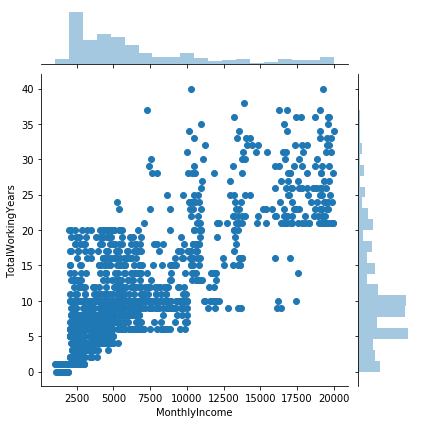

In [24]:
sns.jointplot('MonthlyIncome', 'TotalWorkingYears', data=final_data)

as the number of working years increases the income increases. positive linear but wont fit regression line..

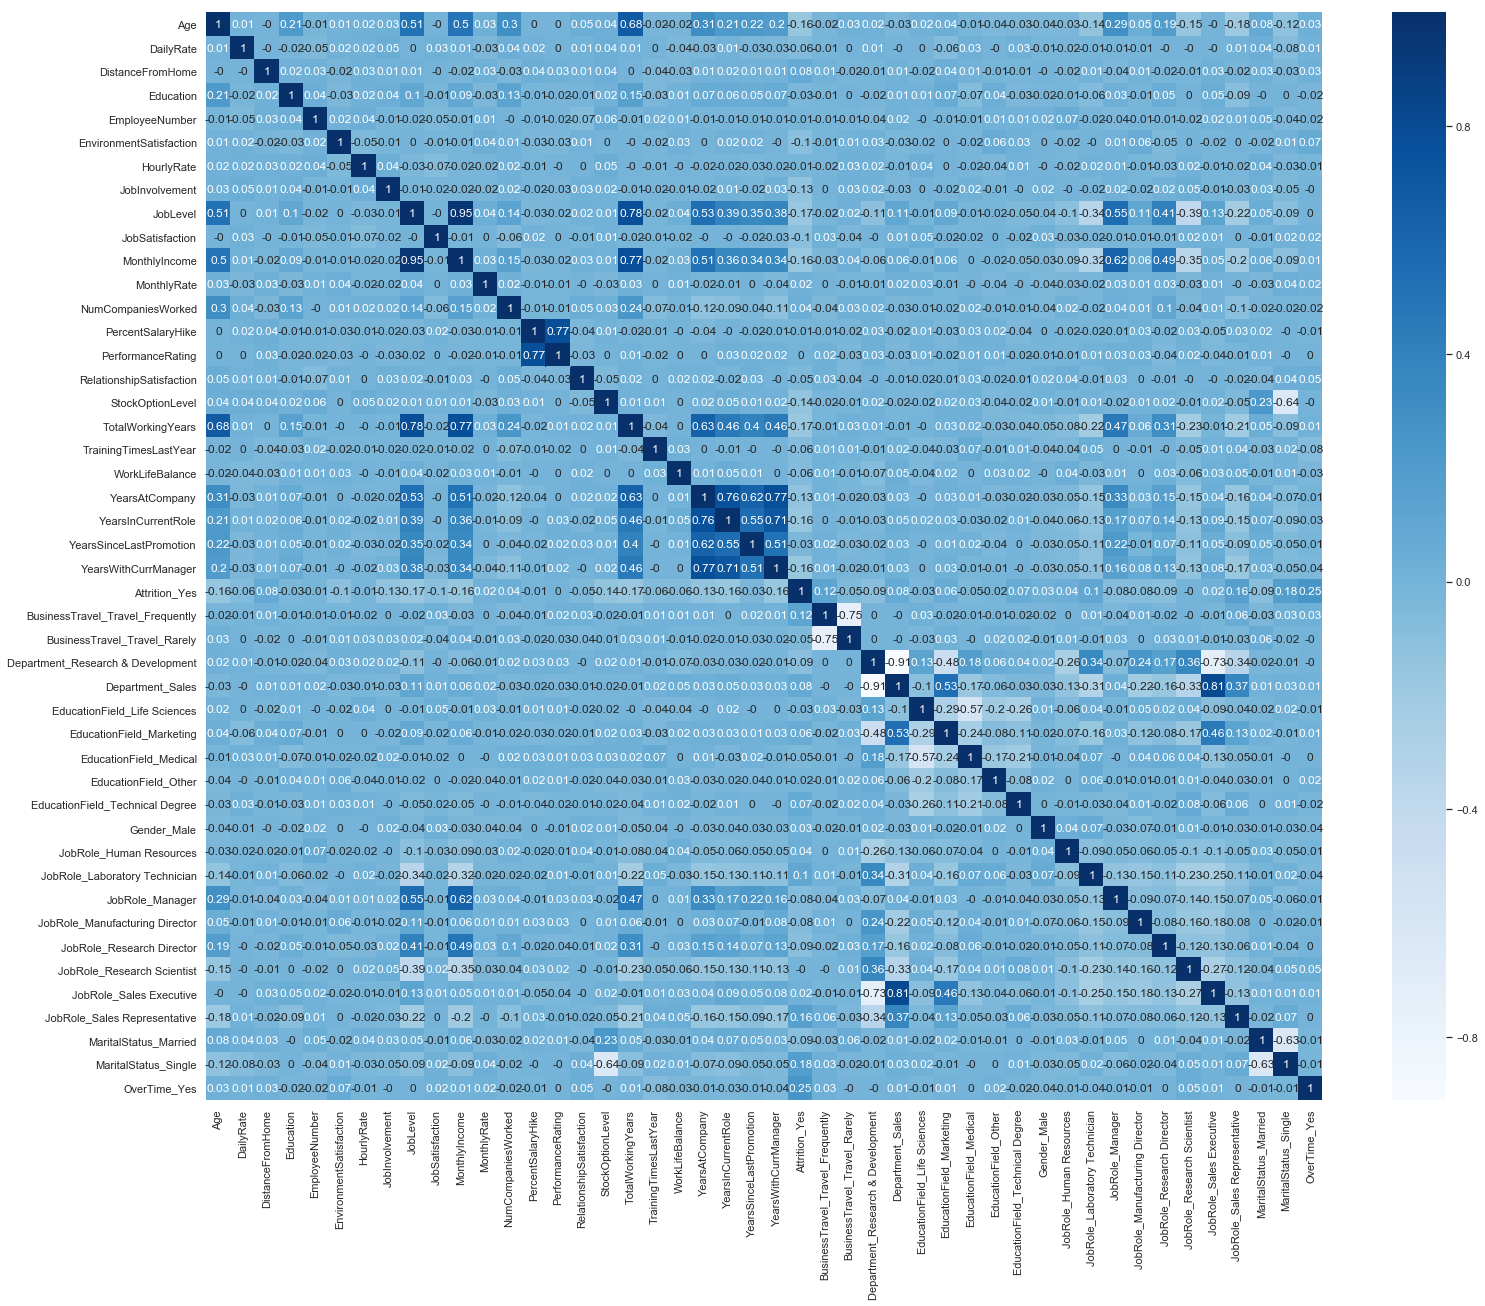

In [42]:
sns.set(rc={'figure.figsize':(25,20)})
#plt.figure(figsize=(20,10))
sns.heatmap(round(df.corr(),2), xticklabels=df.corr().columns,
        yticklabels=df.corr().columns,cmap="Blues", annot=True)

There is a high correlation between "joblevel" and "monthly income". which is plausible as higher your job level, higher income you get..another good correlation is between job level and total working years (more experience tends to better level and hence better monthly income)

Text(0,0.5,'count')

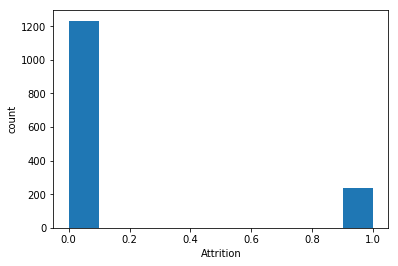

In [38]:
plt.hist('Attrition_Yes', data=final_data)
plt.xlabel("Attrition")
plt.ylabel('count')

Imbalanced dataset

In [52]:
#Pearson’s Chi-Square statistical hypothesis for testing independence between categorical variables.
from scipy.stats import chi2_contingency
  
chi2_stat, p_val, dof, ex = chi2_contingency(final_data)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
5198992.521899552


===Degrees of Freedom===
64636


===P-Value===
0.0


===Contingency Table===
[[4.53365523e+01 9.85324539e+02 1.12869456e+01 ... 5.62133825e-01
  3.92574885e-01 3.47470536e-01]
 [5.16806559e+01 1.12320447e+03 1.28663677e+01 ... 6.40795192e-01
  4.47509272e-01 3.96093313e-01]
 [1.02416553e+01 2.22587599e+02 2.54975291e+00 ... 1.26987620e-01
  8.86837763e-02 7.84945765e-02]
 ...
 [1.97366468e+01 4.28947535e+02 4.91361708e+00 ... 2.44717257e-01
  1.70902096e-01 1.51266536e-01]
 [3.36201934e+01 7.30686386e+02 8.37005185e+00 ... 4.16861163e-01
  2.91121466e-01 2.57673468e-01]
 [2.61501681e+01 5.68336165e+02 6.51032134e+00 ... 3.24239344e-01
  2.26437581e-01 2.00421348e-01]]
